# Exercise 4.3 | Categorical Predictors

Using a binary categorical variable to predict neighborhood pollution using median income.

In [2]:
# Imports
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-4-3/data/'

In [10]:
data = pd.read_csv(file_path + 'neighborhood_dummy.csv', index_col=0)
data.head()

,pollution,low_income
0,27.483571,0.0
1,24.308678,0.0
2,28.238443,0.0
3,32.615149,0.0
4,23.829233,0.0


#### Step 1. Summarize the data

([<matplotlib.axis.XTick at 0x7f563abe5d90>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

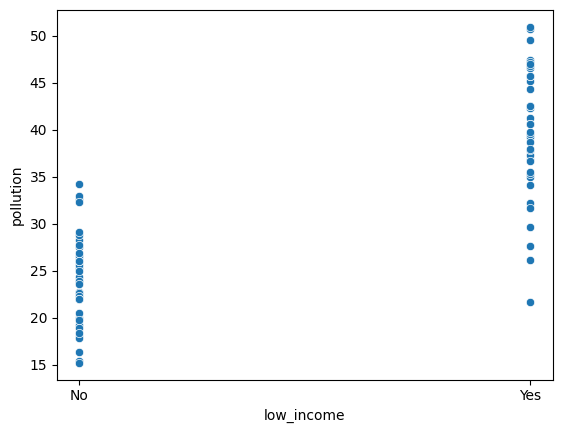

In [13]:
sns.scatterplot(data, x='low_income', y='pollution')
plt.xticks([0,1], labels=['No', 'Yes'])

#### Step 2 & 3: Built and estimate the model

In [14]:
# Model: y = b + mx
model = smf.ols('pollution ~ low_income', data).fit() # Intercept is included by default
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9068      0.924     25.873      0.000      22.067      25.746
low_income    15.8899      1.307     12.160      0.000      13.288      18.491


#### Step 4: Check the residuals

Text(0, 0.5, 'Residuals')

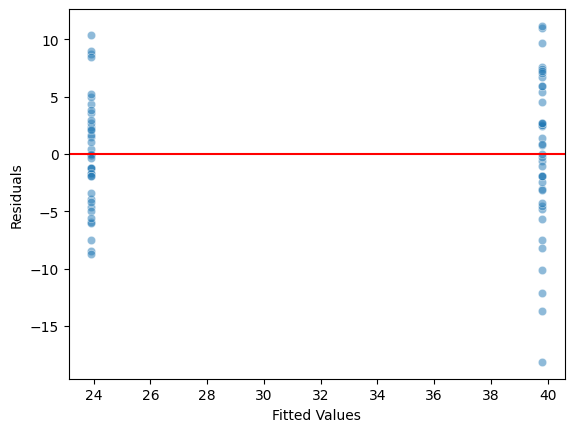

In [24]:
sns.scatterplot(x=model.predict(), y=model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

In [22]:
# Model: y = b + mx with robust standard errors
model = smf.ols('pollution ~ low_income', data).fit(cov_type='HC3') # Intercept is included by default
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9068      0.763     31.338      0.000      22.412      25.402
low_income    15.8899      1.323     12.007      0.000      13.296      18.484


#### Step 5: Communicate the findings